In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("kc_house_data.csv")
df=df.drop('id',axis=1)
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].apply(lambda date:date.month)
df['year']=df['date'].apply(lambda date:date.year)
df=df.drop('date',axis=1)
df=df.drop('zipcode',axis=1)
x=df.drop('price',axis=1)
y=df['price']



In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [15]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
from sklearn import metrics
def print_evaluate(true,predicted,train=True):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    if train:
        print("Training Result")
        print('MAE:',mae)
        print('MSE:',mse)
        print('RMSE:',rmse)
        print('R2 Square:',r2_square)
    elif not train:
        print("Testing Result")
        print('MAE:',mae)
        print('MSE:',mse)
        print('RMSE:',rmse)
        print('R2 Square:',r2_square)
        


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
model=Sequential()

model.add(Dense(x_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))


model.compile(optimizer=Adam(0.001),loss='mse')

In [18]:
import tensorflow as tf
print(tf.__version__)

2.10.0


Epoch 1/500
119/119 [==============================] - 2s 10ms/step - loss: 423599407104.0000 - val_loss: 432824811520.0000
Epoch 2/500
119/119 [==============================] - 1s 8ms/step - loss: 418335752192.0000 - val_loss: 413540646912.0000
Epoch 3/500
119/119 [==============================] - 1s 8ms/step - loss: 337744265216.0000 - val_loss: 245200568320.0000
Epoch 4/500
119/119 [==============================] - 1s 8ms/step - loss: 140733284352.0000 - val_loss: 105065914368.0000
Epoch 5/500
119/119 [==============================] - 1s 8ms/step - loss: 99145588736.0000 - val_loss: 100949368832.0000
Epoch 6/500
119/119 [==============================] - 1s 7ms/step - loss: 96727056384.0000 - val_loss: 97968594944.0000
Epoch 7/500
119/119 [==============================] - 1s 6ms/step - loss: 94338310144.0000 - val_loss: 95366176768.0000
Epoch 8/500
119/119 [==============================] - 1s 6ms/step - loss: 91837390848.0000 - val_loss: 92759588864.0000
Epoch 9/500
119/119 [=

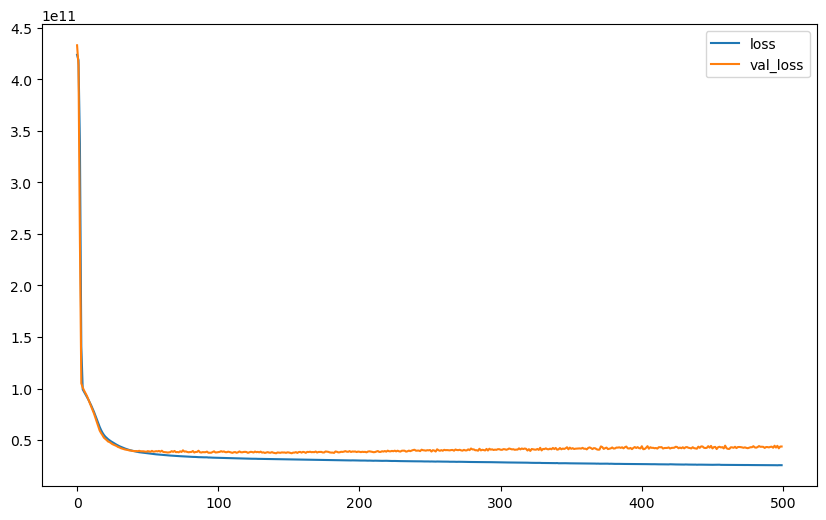

203/203 [==============================] - 1s 4ms/step
Training Result
MAE: 100340.17966158356
MSE: 25502025364.673904
RMSE: 159693.53576358032
R2 Square: 0.8074139064546503
Testing Result
MAE: 142758.40907017438
MSE: 43786878106.7719
RMSE: 209253.14360069216
R2 Square: 0.6878495188274022


In [21]:
r=model.fit(x_train,y_train.values,validation_data=(x_test,y_test.values),batch_size=128,epochs=500)
plt.figure(figsize=(10,6))
plt.plot(r.history['loss'],label='loss')

plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print_evaluate(y_train,y_train_pred,train=True)
print_evaluate(y_test,y_test_pred,train=False)